In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#for importing data
#path_of_data_including_format
dataset=pd.read_csv(r"C://Users//HOME//jupe/Flipkart_Mobiles.csv")

In [3]:
#for viewing first five column of data
dataset.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [4]:
#check for null value if present
dataset.isnull().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

In [5]:
#filling null value
dataset["Rating"]=dataset["Rating"].fillna(dataset["Rating"].mean())


In [6]:
#check value filled or not
dataset.isnull().sum()

Brand              0
Model              0
Color              0
Memory            43
Storage           39
Rating             0
Selling Price      0
Original Price     0
dtype: int64

In [7]:
#droping left missing value
dataset.dropna(inplace=True)

In [8]:
#check for null value if available after dropping
print(dataset.isnull().sum())

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64


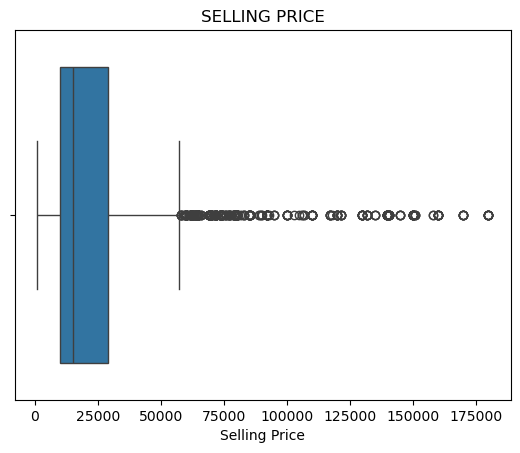

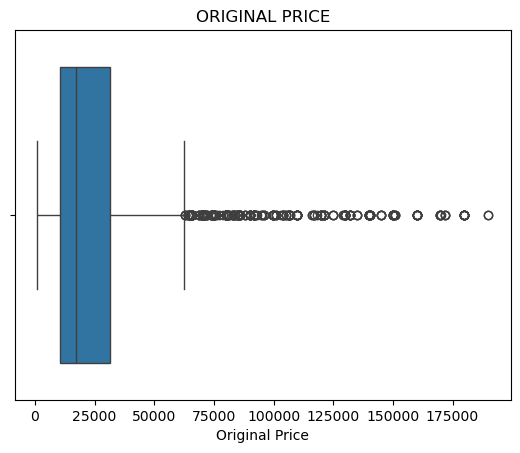

In [21]:
#handling outliers we take 2 columns for outliers selling price and original price
sns.boxplot(x="Selling Price",data=dataset)
plt.title("SELLING PRICE")
plt.show()

sns.boxplot(x="Original Price",data=dataset)
plt.title("ORIGINAL PRICE")
plt.show()

In [22]:
#formula for removing outliers
q1=dataset["Selling Price"].quantile(0.25)
q3=dataset["Selling Price"].quantile(0.75)

In [23]:
#formula for removing outliers
IQR=q3-q1
IQR

19003.0

In [24]:
#finding range of outliers
min_r=q1-(1.5*IQR)
max_r=q3+(1.5*IQR)
min_r,max_r

(-18508.5, 57503.5)

In [25]:
#formula for removing outliers
Oq1=dataset["Original Price"].quantile(0.25)
Oq3=dataset["Original Price"].quantile(0.75)

In [26]:
#formula for removing outliers
OIQR=q3-q1
OIQR

19003.0

In [27]:
#finding range of outliers
Omin_r=Oq1-(1.5*OIQR)
Omax_r=Oq3+(1.5*OIQR)
Omin_r,Omax_r

(-18014.5, 59993.75)

In [33]:
#creating new dataset
new_data=dataset[dataset["Selling Price"]<=max_r]
new_data=dataset[dataset["Original Price"]<=Omax_r]

In [34]:
new_data

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


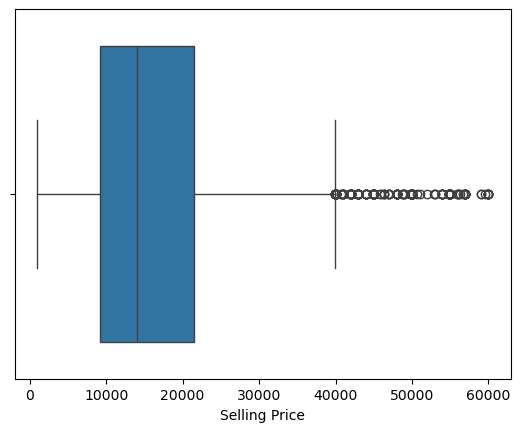

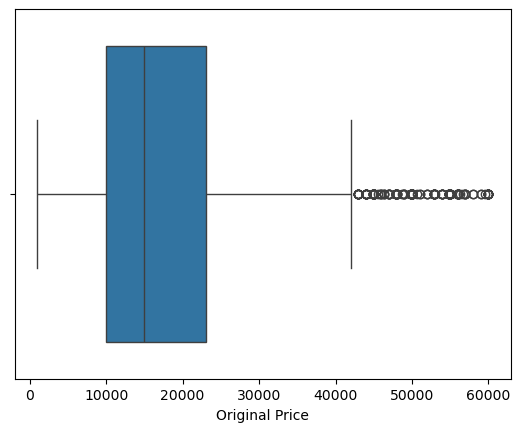

In [35]:
#view dataset after removing outliers
sns.boxplot(x="Selling Price",data=new_data)
plt.show()
sns.boxplot(x="Original Price",data=new_data)
plt.show()

In [36]:
#using z-score

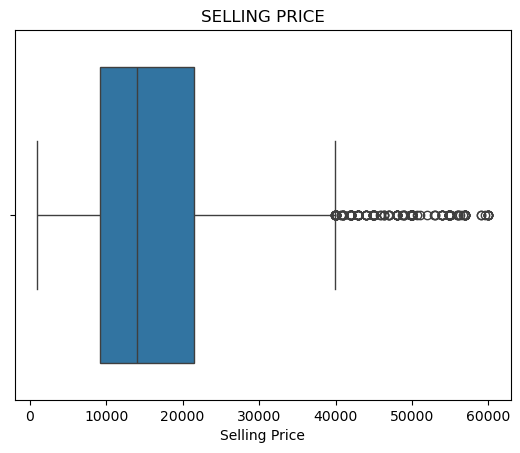

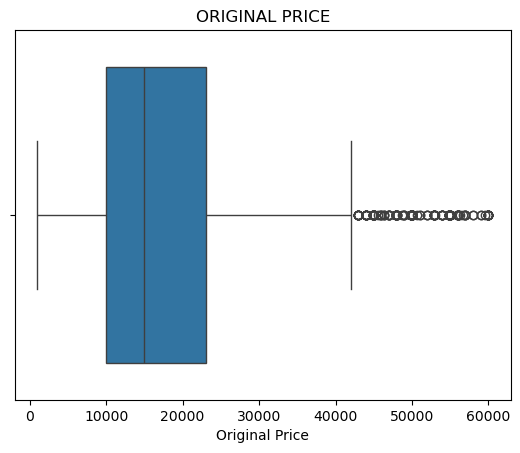

In [37]:
sns.boxplot(x="Selling Price",data=new_data)
plt.title("SELLING PRICE")
plt.show()

sns.boxplot(x="Original Price",data=new_data)
plt.title("ORIGINAL PRICE")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_8492\3955227192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data1['Selling Price'])


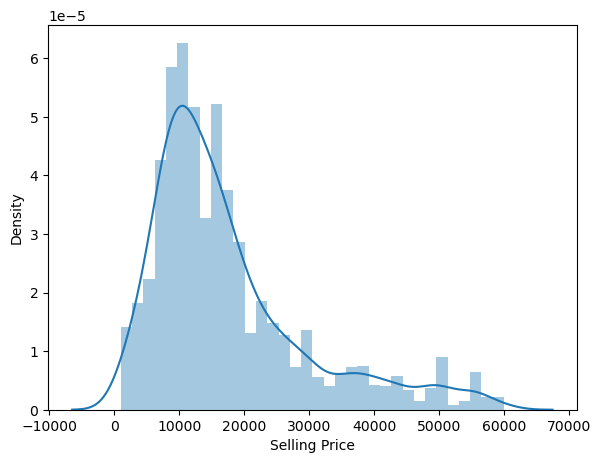

C:\Users\HOME\AppData\Local\Temp\ipykernel_8492\3955227192.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data1["Original Price"])


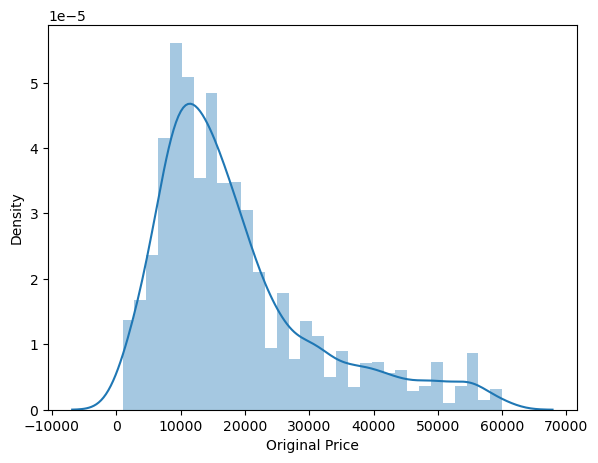

In [39]:
#checking normalization before Z-score
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Selling Price'])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.distplot(new_data1["Original Price"])
plt.show()

In [40]:
#formula for 
min_range=new_data1["Selling Price"].mean()-(3*new_data1["Selling Price"].std())
max_range=new_data1["Selling Price"].mean()+(3*new_data1["Selling Price"].std())
min_range,max_range

Omin_range=new_data1["Original Price"].mean()-(3*new_data1["Original Price"].std())
Omax_range=new_data1["Original Price"].mean()+(3*new_data1["Original Price"].std())
Omin_range,Omax_range

(-19334.136622773676, 56710.79831617167)

In [41]:
new_data1=dataset[dataset["Selling Price"]<=max_range]
new_data1=dataset[dataset["Original Price"]<=Omax_range]


In [42]:
z_score=(new_data1['Selling Price']-new_data1['Selling Price'].mean())/(new_data1['Selling Price'].std())
Oz_score=(new_data1['Original Price']-new_data1['Original Price'].mean())/(new_data1['Original Price'].std())

In [ ]:
new_data1["z_score"]=z_score
new_data1["Oz_score"]=Oz_score

In [ ]:
new_data1[dataset['z_score']<3].shape
new_data1[dataset['Oz_score']<3].shape

C:\Users\HOME\AppData\Local\Temp\ipykernel_8492\519432472.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data1['Selling Price'])


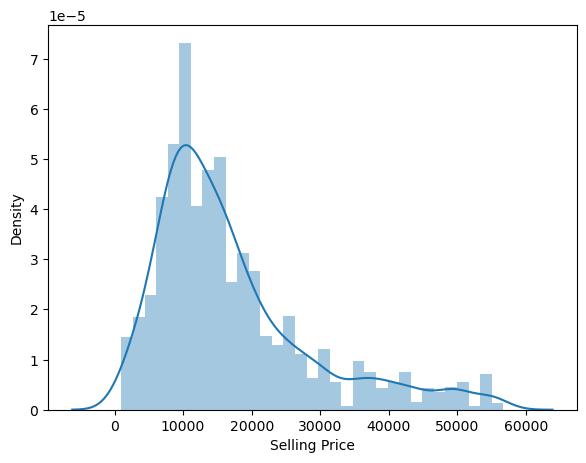

C:\Users\HOME\AppData\Local\Temp\ipykernel_8492\519432472.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data1["Original Price"])


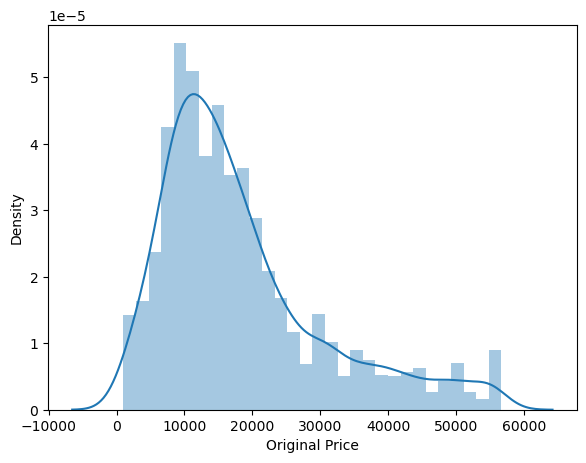

In [45]:
#checking normalization After Z-score
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Selling Price'])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.distplot(new_data1["Original Price"])
plt.show()

In [46]:
dataset.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [47]:
#performing Standardization of data importing StandardScaler from scikit learn module
from sklearn.preprocessing import StandardScaler

In [ ]:
#fitting and transforming data for standardization
ss=StandardScaler()
new_data1["Sp_ss"]=pd.DataFrame(ss.fit_transform(new_data1[["Selling Price"]]),columns=["X"])

ss=StandardScaler()
new_data1["Op_ss"]=pd.DataFrame(ss.fit_transform(new_data1[["Original Price"]]),columns=["X"])

C:\Users\HOME\AppData\Local\Temp\ipykernel_8492\3275415152.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data1['Selling Price'])


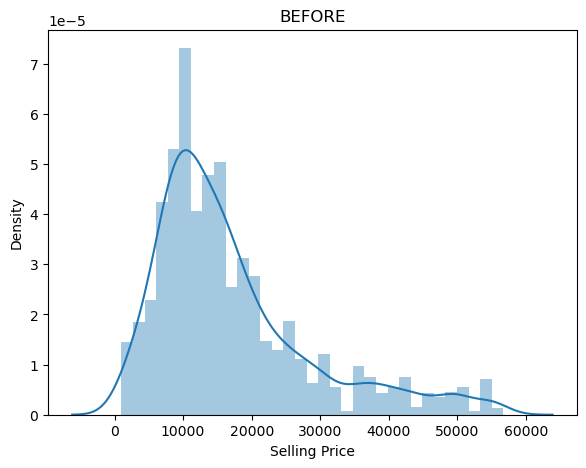

C:\Users\HOME\AppData\Local\Temp\ipykernel_8492\3275415152.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data1["Sp_ss"])


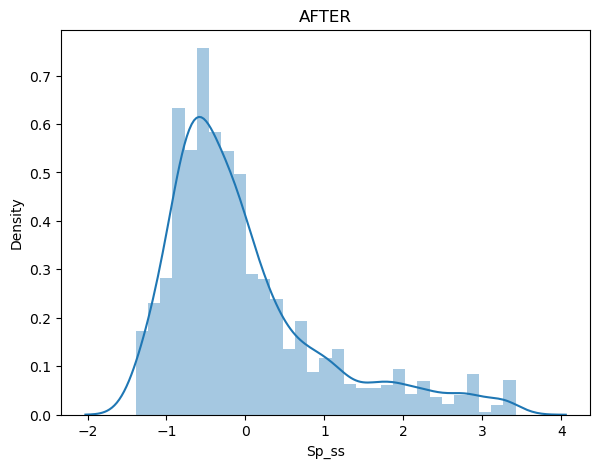

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Selling Price'])
plt.title("BEFORE")
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.distplot(new_data1["Sp_ss"])
plt.title("AFTER")
plt.show()


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Original Price'])
plt.title("BEFORE")
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.distplot(new_data1["Op_ss"])
plt.title("AFTER")
plt.show()


In [ ]:
#performing normalization using min max scaler from sklearn module
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#transforming and fitting data
mm=MinMaxScaler()
new_data1["Sp_mm"]=pd.DataFrame(mm.fit_transform(new_data1[["Selling Price"]]))
                            
mm=MinMaxScaler()
new_data1["Op_mm"]=pd.DataFrame(mm.fit_transform(new_data1[["Original Price"]]))

In [ ]:
#visualizing table
new_data1.describe()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Selling Price'])
plt.title("BEFORE")
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.distplot(new_data1["Sp_mm"])
plt.title("AFTER")
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Original Price'])
plt.title("BEFORE")
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.distplot(new_data1["Op_mm"])
plt.title("AFTER")
plt.show()

In [ ]:
new_data1.info()

In [ ]:
dataset.duplicated()

In [ ]:
new_data1.describe()